In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)


#DataProcess

In [23]:
data_dir = 'E:\Work_DatPT\Study\Master\dataset'
df_capec = pd.read_csv(data_dir + '/data_capec_multilabel_all.csv')
df_capec.head()
## Delete blank text in http request
df_capec = df_capec[df_capec['request_http_request'] != '/']


C:\Users\ngngo\AppData\Local\Temp\ipykernel_20456\669375264.py:2: DtypeWarning: Columns (9,11,12,13,14,15,16,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_capec = pd.read_csv(data_dir + '/data_capec_multilabel.csv')


In [24]:
def create_text(method, request, body):
    if method == 'GET':
        return str(method) + ' ' + str(request)
    return str(method) + ' ' + str(request) + ' ' + str(body)
def count_duplicate(a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13):
    return a0+a1+a2+a3+a4+a5+a6+a7+a8+a9+a10+a11+a12+a13
        
df_capec['count-label'] = df_capec.apply(lambda x: count_duplicate(x['000 - Normal'],x['272 - Protocol Manipulation'], x['242 - Code Injection'],x['88 - OS Command Injection'],x['126 - Path Traversal'],x['66 - SQL Injection'],x['16 - Dictionary-based Password Attack'],x['310 - Scanning for Vulnerable Software'],x['153 - Input Data Manipulation'],x['248 - Command Injection'],x['274 - HTTP Verb Tampering'],x['194 - Fake the Source of Data'],x['34 - HTTP Response Splitting'],x['33 - HTTP Request Smuggling']), axis = 1)
df_capec['text'] = df_capec.apply(lambda x: create_text(x['request_http_method'], x['request_http_request'], x['request_body']), axis = 1)

In [25]:
selected_columns = [
    '000 - Normal',
    '272 - Protocol Manipulation',
    '242 - Code Injection',
    '88 - OS Command Injection',
    '126 - Path Traversal',
    '66 - SQL Injection',
    '16 - Dictionary-based Password Attack',
    '310 - Scanning for Vulnerable Software',
    '153 - Input Data Manipulation',
    '248 - Command Injection',
    '274 - HTTP Verb Tampering',
    '194 - Fake the Source of Data',
    '34 - HTTP Response Splitting',
    '33 - HTTP Request Smuggling',
    'count-label',
    'text'
]

# Select and create a new DataFrame with the specified columns
df_capec = df_capec[selected_columns]
df_capec[df_capec['count-label'] > 2].head()

,000 - Normal,272 - Protocol Manipulation,242 - Code Injection,88 - OS Command Injection,126 - Path Traversal,66 - SQL Injection,16 - Dictionary-based Password Attack,310 - Scanning for Vulnerable Software,153 - Input Data Manipulation,248 - Command Injection,274 - HTTP Verb Tampering,194 - Fake the Source of Data,34 - HTTP Response Splitting,33 - HTTP Request Smuggling,count-label,text
4740,0,1,0,0,1,0,0,1,0,0,0,0,0,0,3,GET /CFIDE/administrator/enter.cfm?locale=..\....
4744,0,1,1,0,0,0,0,1,0,0,0,0,0,0,3,POST /?-d+allow_url_include%3d1+-d+auto_prepen...
4756,0,1,0,0,1,0,0,1,0,0,0,0,0,0,3,GET /CFIDE/administrator/enter.cfm?locale=..\....
4790,0,1,0,0,1,0,0,1,0,0,0,0,0,0,3,GET /CFIDE/administrator/enter.cfm?locale=..\....
4798,0,1,0,0,1,0,0,1,0,0,0,0,0,0,3,GET /CFIDE/administrator/enter.cfm?locale=..\....


   count-label   count
0            1  599755
1            2    7946
2            3    1087
3            4      18


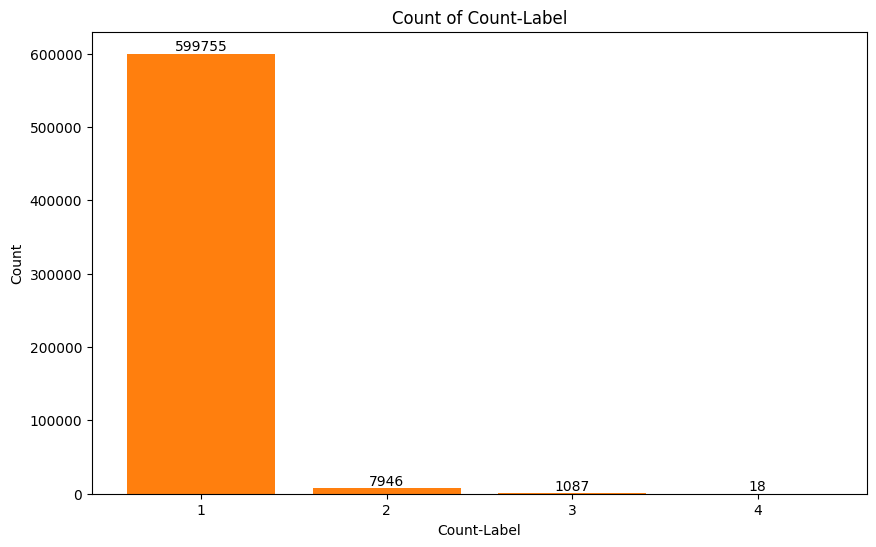

In [26]:
count_df = df_capec['count-label'].value_counts().reset_index()
count_df.columns = ['count-label', 'count']
print(count_df)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  # Define the size of the plot
plt.bar(count_df['count-label'], count_df['count'])
bars = plt.bar(count_df['count-label'], count_df['count'])
plt.xlabel('Count-Label')
plt.ylabel('Count')
plt.title('Count of Count-Label')
plt.xticks(count_df['count-label'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(int(yval)), ha='center', va='bottom')

plt.show()

In [27]:
multilabel_df = df_capec[df_capec['count-label'] == 3 ]
# Reset the index of the new DataFrame
multilabel_df = multilabel_df.reset_index(drop=True)
multilabel_df.head()

,000 - Normal,272 - Protocol Manipulation,242 - Code Injection,88 - OS Command Injection,126 - Path Traversal,66 - SQL Injection,16 - Dictionary-based Password Attack,310 - Scanning for Vulnerable Software,153 - Input Data Manipulation,248 - Command Injection,274 - HTTP Verb Tampering,194 - Fake the Source of Data,34 - HTTP Response Splitting,33 - HTTP Request Smuggling,count-label,text
0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,3,GET /CFIDE/administrator/enter.cfm?locale=..\....
1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,3,POST /?-d+allow_url_include%3d1+-d+auto_prepen...
2,0,1,0,0,1,0,0,1,0,0,0,0,0,0,3,GET /CFIDE/administrator/enter.cfm?locale=..\....
3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,3,GET /CFIDE/administrator/enter.cfm?locale=..\....
4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,3,GET /CFIDE/administrator/enter.cfm?locale=..\....


In [28]:
#Duplicate multilabel
for index, row in multilabel_df.iterrows():
    labels = []  # Create a list to store column names with cell value == 1
    for column in multilabel_df.columns:
        cell_value = row[column]
        if cell_value == 1:
            labels.append(column)
    # Convert the list of labels to a comma-separated string
    label_str = ', '.join(labels)
    # Add a new column "label" with the comma-separated labels
    multilabel_df.at[index, 'label'] = label_str   
multilabel_df.head()

KeyError: 'label'

In [ ]:

df_final = multilabel_df.loc[:, ['text','label']].reset_index(drop=True)
df_final.head()

In [ ]:


# Assuming 'df' is your DataFrame with the "label" column
# Create a count of labels and their occurrences
label_counts = df_final['label'].str.split(', ').explode().value_counts()
label_counts.head()
# Create a color palette for the bars
# colors = sns.color_palette("Set2", len(label_counts))

# # Create a bar chart with specified colors
# plt.figure(figsize=(12, 6))
# ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette=colors)

# # Add labels to the bars
# for i, (label, count) in enumerate(label_counts.items()):
#     ax.text(i, count, str(count), ha='center', va='bottom')

# # Customize the chart
# total_count = label_counts.sum()
# plt.title(f'Label Counts (Total: {total_count})')
# plt.ylabel('Count')

# # Rotate the x-axis labels for readability
# plt.xticks(rotation=45, ha="right")

# # Show the chart
# plt.tight_layout()
# plt.show()


In [ ]:

data_multilabel = {'httprequest': [], 'label': []}
for index, row in df_final.iterrows():
    # Truy cập dữ liệu của từng cột trong hàng
    text = row['text']
    labels = row['label'].split(", ")
    for label in labels:
        data_multilabel['httprequest'].append(text)
        data_multilabel['label'].append(label)

df_multilabel  =pd.DataFrame(data_multilabel)
df_multilabel.head()

In [ ]:
df_multilabel.to_csv('dataset_capec_multilabel.csv', encoding='utf-8', index=False)